In [1]:
charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [2]:
from urllib.request import urlretrieve
import pandas as pd

urlretrieve(charges_url, "datasets/medical.csv")

('datasets/medical.csv', <http.client.HTTPMessage at 0x7fd71173ab20>)

In [3]:
df = pd.read_csv('datasets/medical.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization

<AxesSubplot:xlabel='age', ylabel='charges'>

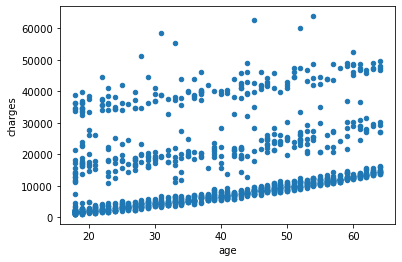

In [6]:
df.plot(x='age', y='charges', kind='scatter')

<AxesSubplot:ylabel='Density'>

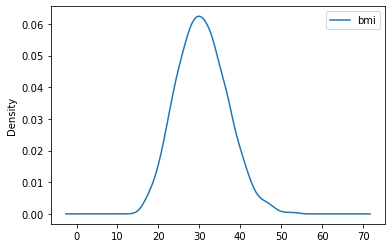

In [7]:
df.plot(y='bmi', kind='kde')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

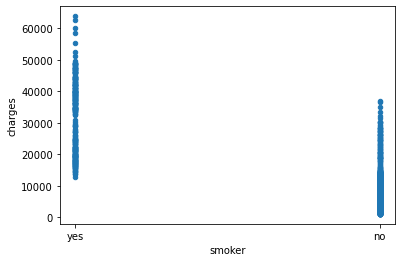

In [8]:
df.plot(x='smoker', y='charges', kind='scatter')

# Correlation

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
enc = OneHotEncoder()
enc.fit(df[['region']])
one_hot = enc.transform(df[['region']]).toarray()
df[['northeast','northwest','southwest','southeast']] = one_hot
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [11]:
# Converting String Labels Into Numeric
smoker_vals = {'no': 0, 'yes': 1}
df['smoker'] = df.smoker.map(smoker_vals)

sex_vals = {'female': 0, 'male': 1}
df['sex'] = df.sex.map(sex_vals)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southwest,southeast
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [12]:
X = df
Y = X.pop('charges')

In [13]:
for column in X.columns:
    print(str(column),":", Y.corr(X[column]))

age : 0.2990081933306477
sex : 0.057292062202025366
bmi : 0.19834096883362887
children : 0.06799822684790482
smoker : 0.7872514304984773
northeast : 0.006348771280156057
northwest : -0.039904864040437985
southwest : 0.07398155156575975
southeast : -0.04321002899168473


# Model Prediction & Acc

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [15]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [16]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [17]:
predictions = model.predict(X)
rmse(predictions, Y)

6041.679651174457

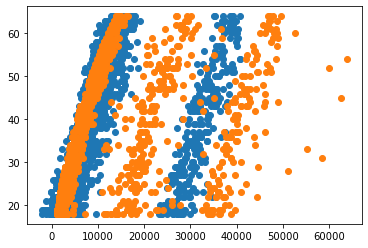

In [18]:
import matplotlib.pyplot as plt

plt.scatter(predictions, df['age'])
plt.scatter(Y, df['age'])

# Save & Load

In [19]:
import joblib

In [20]:
med_charges = {
    'model': model,
    'encoder': enc,
    'train_X': X,
    'train_Y': Y,
}

In [21]:
joblib.dump(med_charges, 'models/med_charges.joblib')

['models/med_charges.joblib']